
# "CANCER DISEASE PREDICTION USING MACHINE LEARNING TECHNIQUES."



# 1. IMPORTING ESSENTIAL LIBRARIES.


In [3]:
import tkinter as tk
from tkinter import messagebox
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import pandas as pd


# 2. IMPORTING & UNDERSTANDING OUR DATA SET.


In [5]:

cancer_data = datasets.load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target



# Shape of dataset.


In [7]:

df.shape


(569, 31)

 # Data Processing.
 # Printing out top 5 rows.

In [9]:

print("\nFirst 5 rows of the dataset (Head):")
print(df.head())



First 5 rows of the dataset (Head):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst pe


 # Printing out bottom 5 rows.


In [11]:

print("\nLast 5 rows of the dataset (Tail):")
print(df.tail())



Last 5 rows of the dataset (Tail):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...


# Description.


In [13]:

print("Dataset Description:")
print(cancer_data.DESCR)


Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is 


# Analysing the 'target' variable.


In [15]:

df["target"].describe()


count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [16]:

df["target"].unique()


array([0, 1])


# Clearly, this is a classification problem, with the target variable having values "0" and "1".



# Select only a subset of features for prediction (using the first 5 features)
# Labels (0 = malignant, 1 = benign)


In [19]:

X = cancer_data.data[:, :5]  
y = cancer_data.target 



# 3. EXPLORATOEY DATA ANALYSIS (EDA).
   
# Analysing the 'target' variable:

target
1    357
0    212
Name: count, dtype: int64


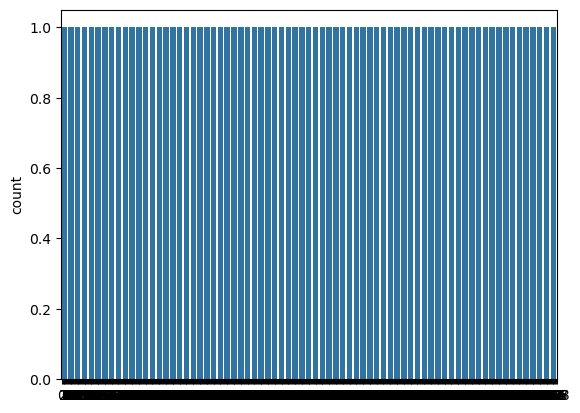

In [21]:

y = df["target"]

sns.countplot(y)

target_temp = df.target.value_counts()

print(target_temp)



print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/568,31)))

print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/568,31)))



# 4. TRAIN-TEST SPLIT. (70% train, 30% test)


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# STANDARDIZE THE DATA


In [26]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:

X_train.shape


(398, 5)

In [28]:

X_test.shape


(171, 5)

In [29]:

y_train.shape


(398,)

In [30]:

y_test.shape


(171,)


# 5. MODEL FITTING AND MODEL EVALUATION.

# 5.1.LOGISTIC REGRESSION.


In [32]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)



# ACCURACY SCORE OF LOGISTIC REGRESSION.


In [34]:

from sklearn.metrics import accuracy_score

accuracy_lr= (accuracy_score(y_test,Y_pred_lr)*100)

print("The accuracy score achieved using Logistic Regression is: "+str(accuracy_lr))


The accuracy score achieved using Logistic Regression is: 94.73684210526315



# R2 SCORE OF LOGISTIC REGRESSION.


In [36]:

from sklearn.metrics import r2_score

r2Score_lr = r2_score(Y_pred_lr,y_test)

print("R2 score of logistic regression model is :" ,r2Score_lr*100,"%")


R2 score of logistic regression model is : 77.52628504672897 %



# MEAN SQUARRED ERROR OF LOGISTIC REGRESSION.


In [38]:

from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(Y_pred_lr,y_test)

print("Mean Squarred Error of Logistic Regression is  :" ,mse_lr*100)


Mean Squarred Error of Logistic Regression is  : 5.263157894736842



# 5.2. RANDOM FOREST CLASSIFIER.


In [40]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Y_pred_rf = model.predict(X_test)



# ACCURACY SCORE OF RANDOM FOREST CLASSIFIER.


In [42]:

accuracy_rf= (accuracy_score(y_test,Y_pred_rf)*100)

print("The accuracy score achieved using Random Forest Classifier is: "+str(accuracy_rf),"%")


The accuracy score achieved using Random Forest Classifier is: 95.90643274853801 %



# R2 SCORE OF RANDOM FOREST CLASSIFIER.


In [44]:

from sklearn.metrics import r2_score

r2Score_rf = r2_score(Y_pred_rf,y_test)

print("R2 score of random forest classifier model is :" ,r2Score_rf*100,"%")


R2 score of random forest classifier model is : 82.72727272727273 %



# MEAN SQUARRED ERROR OF RANDOM FOREST CLASSIFIER.


In [46]:

from sklearn.metrics import mean_squared_error

mse_rf = mean_squared_error(Y_pred_rf,y_test)

print("Mean Squarred Error of random forest classifier is  :" ,mse_rf*100)


Mean Squarred Error of random forest classifier is  : 4.093567251461988



# 6. FINAL OUTPUT .

# 6.1 ACCURACY SCORE OF 2 ALGORITHMS.


In [48]:

print("The accuracy score achieved using Logistic Regression is: "+str(accuracy_lr)+" %")

print("The accuracy score achieved using Random Forest Classifier is: "+str(accuracy_rf)+" %")


The accuracy score achieved using Logistic Regression is: 94.73684210526315 %
The accuracy score achieved using Random Forest Classifier is: 95.90643274853801 %



# 6.2 R2 SCORE OF 2 ALGORITHMS.


In [50]:

print("The r2 score achieved using Logistic Regression is: "+str(r2Score_lr*100)+" %")

print("The r2 score achieved using Random Forest Classifier is: "+str(r2Score_rf*100)+" %")


The r2 score achieved using Logistic Regression is: 77.52628504672897 %
The r2 score achieved using Random Forest Classifier is: 82.72727272727273 %



# 6.3 MEAN SQUARRED ERROR OF 2 ALGORITHMS.


In [52]:

print("The mean squared error achieved using Logistic Regression is: "+str(mse_lr*100)+" %")

print("The mean squared error achieved using Random Forest Classifier is: "+str(mse_rf*100)+" %")


The mean squared error achieved using Logistic Regression is: 5.263157894736842 %
The mean squared error achieved using Random Forest Classifier is: 4.093567251461988 %



# 7. FUNCTION TO PREDICT CANCER 


In [54]:

def show_entry_fields():
    try:
        # Get input from the user (only the first 5 features)
        p1 = float(e1.get())
        p2 = float(e2.get())
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        
        # Create input array and standardize it
        user_input = np.array([[p1, p2, p3, p4, p5]])
        user_input = scaler.transform(user_input)  # Standardize the user input
        
        # Predict using the trained model
        prediction = model.predict(user_input)

        # Show result
        if prediction == 0:
            tk.Label(root, text="PATIENT HAS NO CANCER (MALIGNANT)", fg="green", font=('Times New Roman Bold', 20)).grid(row=22, column=0, columnspan=2)
        else:
            tk.Label(root, text="PATIENT HAS CANCER (BENIGN)", fg="red", font=('Times New Roman Bold', 20)).grid(row=22, column=0, columnspan=2)

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")



# 8. GUI OF CANCER DISEASE PREDICTION SYSTEM.


In [56]:

# Create the main window
root = tk.Tk()
root.title("Cancer Prediction")

# Title label
tk.Label(root, text="CANCER PREDICTION SYSTEM", bg="white", fg="green", font=('Times New Roman Bold', 35), borderwidth=2, relief="solid").grid(row=3, columnspan=2)

# Set up the labels and entry fields for user input (only 5 selected features)
tk.Label(root, text="Mean radius ", fg="blue", font=('Times New Roman Bold', 25)).grid(row=6)
tk.Label(root, text="Mean texture ", fg="blue", font=('Times New Roman Bold', 25)).grid(row=8)
tk.Label(root, text="Mean perimeter ", fg="blue", font=('Times New Roman Bold', 25)).grid(row=10)
tk.Label(root, text="Mean area ", fg="blue", font=('Times New Roman Bold', 25)).grid(row=12)
tk.Label(root, text="Mean smoothness" , fg="blue", font=('Times New Roman Bold', 25)).grid(row=14)

# Create entry fieldsblac
e1 = tk.Entry(root)
e2 = tk.Entry(root)
e3 = tk.Entry(root)
e4 = tk.Entry(root)
e5 = tk.Entry(root)

# Grid the entry fields
e1.grid(row=6, column=1)
e2.grid(row=8, column=1)
e3.grid(row=10, column=1)
e4.grid(row=12 ,column=1)
e5.grid(row=14, column=1)

# Create a button to trigger the prediction
tk.Button(root, text='PREDICT', font=('Times New Roman Bold', 25), command=show_entry_fields, bg="white", fg="blue", borderwidth=2, relief="solid").grid(row=18, column=0, columnspan=2)

# Run the application
root.mainloop()
